(MARCOnl)
	Soccer finished
	Kickbox finished
	SBoard finished
	Soccer2 finished
	Walk1 finished
	Walk2 finished
	Volleyball finished
	Juggling finished
	Run2 finished
elapsed 2.4187734127044678


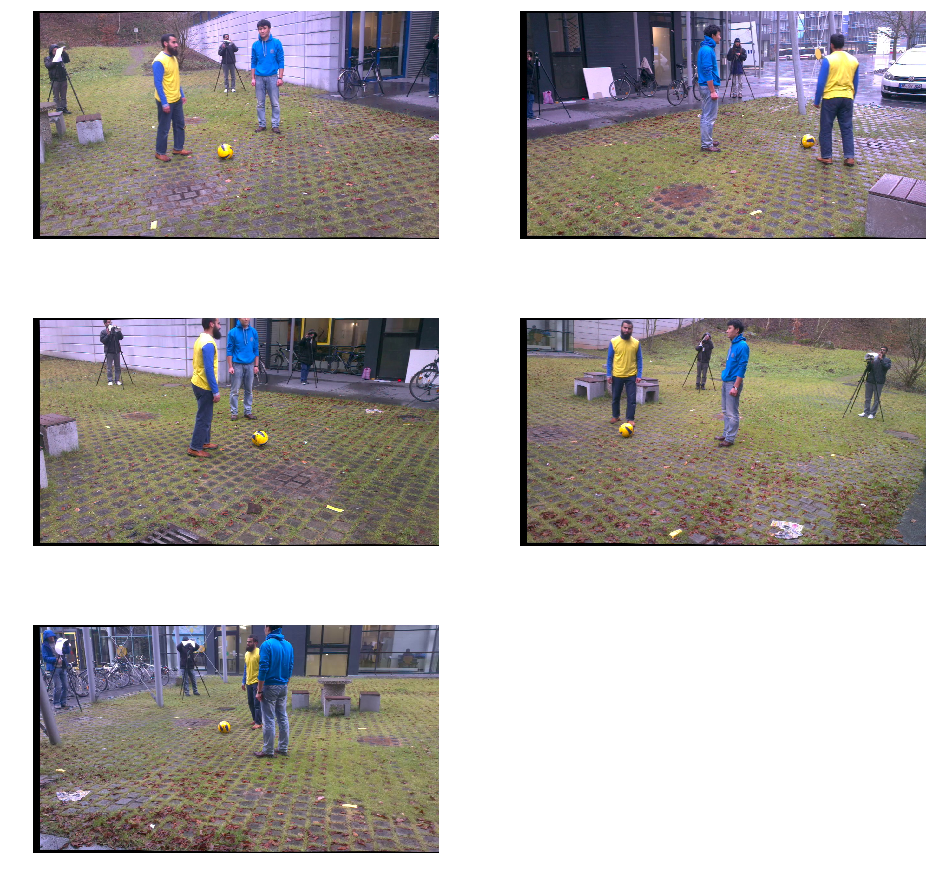

In [2]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../'); sys.path.insert(0, '.')
import paf_loader
from os.path import join, isdir
import numpy as np
import cv2
from cselect import color as cs
from time import time

root = join(Settings['data_root'], 'pak')

from pak.datasets.MARCOnI import MARCOnI

_start = time()
marconi = MARCOnI(root)

FRAME = 0

MARCOnI_ds = 'Soccer'
Im_all, Annotations  = marconi[MARCOnI_ds]
n_cams, n_frames, h, w, c = Im_all.shape

Im = np.squeeze(Im_all[:,FRAME,:,:])

heatmaps, pafs = paf_loader.load_confidence_map_and_paf(
    'mar_' + MARCOnI_ds, Im, FRAME)
_end = time(); print('elapsed', _end - _start)

fig = plt.figure(figsize=(16,16))
for cam in range(n_cams):
    #im = Im[cam, FRAME]
    im = Im[cam]
    ax = fig.add_subplot(3,2,cam+1); ax.axis('off')
    ax.imshow(im)

plt.show()

In [4]:
from mvpose import pose
from mvpose.algorithm import graphcut

_start = time()
Debug, detections = pose.estimate_heuristic(
    Calib, heatmaps, pafs, debug=True)
_end = time()
print('\ntotal elapsed:', _end - _start)